## Project 4 - Bayesian Calculations

**Exercise 1:**

- Create a Bayesian Regression class that takes a log posteriori, data points, number of walkers, etc as initilization and provides all required methods and attributes required for Bayesian Regression Problems. 
- The class should also be able to provide an integration method that allows you to integrate with respect to the posteriori distribution. 
- Additionally, the class should allow to calculate all probabilities including the predictive distribution. 
- Also include methods for visualization such as corner maps. 
- Even though this class is part of a project you should consider it as your first self build Data Science tool. 

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.special import gamma
import emcee
%matplotlib inline
import pandas as pd
import corner

data = [(12.676817787115283, 4.840968499185621),
 (3.0635215093963133, 3.14922059397124),
 (8.9357879700357667, 5.431164887988198),
 (13.150389074317657, 0.2734372074578954),
 (12.925121692101902, 5.02106046462978),
 (10.269853674176913, 3.7776881451798454),
 (8.5618490817719284, 1.7531496843623315),
 (11.652310665546354, 0.13740741237008774),
 (15.785676964359141, 0.1589401373556326),
 (10.709910995988764, 1.405806821770987),
 (7.1341191045745171, 5.791539306670335),
 (21.883583042704814, 5.375575646320319),
 (9.3509495831601566, 1.5283167578387404),
 (8.9421204746670746, 1.2943521169392636),
 (7.9107785943448947, 2.41326855106268),
 (6.6761875778137583, 5.605375440538395),
 (11.650996974527924, 4.935997586415922),
 (17.290020321649969, 5.274010438371379),
 (13.06634684581484, 0.2347909715055829),
 (9.2602800850011402, 1.9716673533870746),
 (13.919837953941261, 5.528598466510076),
 (7.9171739378319606, 5.84750784658713),
 (12.864499776009934, 0.8278490177929644),
 (10.571617689971236, 2.36723797633488),
 (15.697626403745566, 6.217581078023053),
 (6.9542139194365262, 3.1860455750181425),
 (13.120156492593505, 4.864593354788696),
 (11.454973850882114, 1.8798442605946453),
 (10.614021877252608, 0.8044135861997307),
 (7.568300166951679, 2.673290291826998),
 (10.183500038106194, 1.309623551484031),
 (13.503996786942462, 0.04020573153381622),
 (14.908454853041013, 5.049774593191907),
 (16.502324161297746, 5.406433813862234),
 (7.7831240000772652, 5.45198929005635),
 (2.7144705188261025, 4.10012261788714),
 (6.3268913726889187, 5.6611505113173575),
 (9.343465517423013, 3.2971190116581632),
 (10.029091959312348, 0.5986208146884879),
 (12.078957723820951, 0.3853462849024228),
 (12.542705834818268, 1.5820979005652125),
 (9.8489274946698337, 2.6735253975153426),
 (11.349497927312719, 1.1055955472925354),
 (11.06556939865615, 2.5611692213120962),
 (11.242786106546351, 0.6500902431293415),
 (7.5720317139333542, 3.4428084142928075),
 (10.19301456907124, 2.427329872753534),
 (11.688185995125892, 0.14941531339444405),
 (13.321217017544326, 4.226862591173392),
 (9.2226853401109601, 2.3990630763955374),
 (7.0737562512314449, 0.8821159241146929),
 (5.5158907409668556, 2.287657630597947),
 (5.2424711689478309, 3.4418528431658317),
 (11.826235109408199, 3.3038133315910185),
 (6.2478202112864949, 3.7493402648869223),
 (7.2776616254733053, 2.666108760536187),
 (14.728663233221567, 5.923646379789856),
 (11.088563226667782, 2.974838497958867),
 (11.458847468046265, 1.2931851555147837),
 (4.0709653063610656, 2.4390760560779694),
 (15.530850378396899, 0.7685325485891545),
 (11.615168564683962, 2.7271570577326223),
 (10.632288760396049, 5.37570954124343),
 (6.9102179020649883, 1.9530381191410195),
 (7.1344237045084675, 1.6373486764522571),
 (2.4211573415830188, 2.810112760589519),
 (7.6108111175276107, 4.181915055702122),
 (9.6538205198090434, 4.444382820070389),
 (8.1905132263562983, 3.0534156042900285),
 (7.4546566492388493, 5.388475797989607),
 (14.087818085722649, 4.961727257154151),
 (7.2780971375915371, 2.54178907740794),
 (13.49355600611988, 2.493864649506947),
 (7.1166182479555999, 3.0195450895358524),
 (13.861336288014931, 6.246482002469356),
 (9.9498449141955589, 1.5817110088866608),
 (12.090250168282912, 3.990269038499848),
 (14.0111497595614, 0.9108297343631235),
 (9.3928518482934216, 3.3950553805254793),
 (8.2709147406350212, 3.214121983305056),
 (8.386404092046515, 2.1119573572471135),
 (6.9673744914092852, 2.2083135342567983),
 (9.5162641851488523, 3.2184133097802943),
 (17.967580316152478, 3.965622119805391),
 (15.832368008468372, 0.828357131652206),
 (5.3317615928107358, 2.6644501925548774),
 (5.8971983697046877, 3.0341229253117494),
 (17.963906775041007, 6.0469989006758444),
 (5.6300726881847361, 2.4077579346402826),
 (11.348534324413565, 3.8699231013565725),
 (10.028167958705753, 1.9397974132848168),
 (14.062219131934697, 4.41603067403343),
 (9.10707255345568, 0.8011371320017451),
 (10.567716164156263, 4.450436137829604),
 (10.928830310193101, 4.839816330906595),
 (11.681478622619728, 0.8572196990559613),
 (11.538949263967641, 5.760338188965996),
 (10.978084516398958, 4.49756314191279),
 (12.818751132975834, 4.411544813273495),
 (6.7181748281785731, 5.484421751460473)]



In [10]:
# manually calculate posterior outside of class as recommended by Killian.

def lnprob(x):
    if x[3] < 0:
        return -np.infty
    else:
        return \
    -0.5*x[3]*np.sum([(e[0] - x[0] - (x[1]*np.sin(e[1]) + x[2]*np.cos(e[1])))**2 for e in data])\
    +0.5*N*np.log(x[3]) - \
    0.5*(x[0]**2 + x[1]**2 + x[2]**2) - x[3]
    
class BayesRegression(object):
    
    def __init__(self, post, data, nwalkers, ndim):
        #
        self.post = post
        self.data = data
        self.nwalkers = nwalkers
        self.ndim = ndim
        #ndim = # of parameters as determined when defining lnprob
        
        
#imported most work done manually in exercise two into class methods        
    def ScatterPlot(self):
        X = [x[0] for x in data]
        T = [x[1] for x in data]
        fig, ax = plt.subplots(1,1, figsize = (5,3))
        ax.scatter(T,X)
        ax.grid()                    
        
    def MonteCarlo(f, samples):
        p0 = np.random.rand(nwalkers*ndim).reshape((nwalkers,ndim))
        sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
        pos, prob, state = sampler.run_mcmc(p0, 1000)
        sampler.reset()
        pos, prob, state = sampler.run_mcmc(pos, 1000)
        samples = sampler.flatchain
        N = len(samples)
        return 1/float(N)*sum([f(e) for e in samples])
        omega0 = MonteCarlo(lambda x: x[0], samples)
        omega1 = MonteCarlo(lambda x: x[1], samples)
        omega2 = MonteCarlo(lambda x: x[2], samples)
        lam = MonteCarlo(lambda x: x[3], samples)
        print ('o0 = {0}, o1 = {1}, o2 = {2}, l = {3}'.format(omega0, omega1, omega2, lam))        
        
    def RegressionPlot(self):
        Xval = np.arange(0,7)
        Reg = [omega0 - omega1*np.sin(x) + omega2*np.cos(x) for x in Xval]
        fig, ax = plt.subplots(1,1, figsize = (5,3))
        ax.scatter(T,X)
        ax.plot(Xval, Reg, label ='Regression', color = 'red')
        ax.set_xlabel('t')
        ax.set_ylabel('$X_t$')
        ax.legend(loc = 'best', fontsize='small')
        ax.grid()
    
    def DensityPlot(self):
        data = pd.DataFrame(samples, columns =['Omega0', 'Omega1', 'Omega2', 'Lambda'])
        data.plot(kind = 'density')
    
    def cornerplot(self):
        fig = corner.corner(samples, labels=["$\omega_0$", "$\omega_1$", "$\omega_2$", "$\lambda$"])
        
test1 = BayesRegression(lnprob, data, 20, 4)

In [13]:
test1.RegressionPlot()

NameError: global name 'omega0' is not defined

**Exercise 2:**

The data below is in the form (x,t) and represents the height x of the tide at a specific location over the course of a day. Time is represented by the variable t. Build a Bayesian Regression Model using your class from Exercise 1. Show us what your new class can do!
1. Start by describing the data. What type of functional behavior do you anticipate? 

Looks nonlinear, something that is not the standard y = mx + b that I'd anticipate for a linear function.
* Use your model to make a prediction about the future. 

Any prediction I'd make even if the regression was a better fit would have a high error probability as there is a big variance in data.
* Create a corner plot.
* What can you say about the variance of your model parameters and what does that mean?

Again, there is a high variance so unsure if linear regression is a good way to model this behavior.


*Bonus!!* 
* What is the probability that the tide is higher than 15 during a day.
* What is the probability that the tide is lower than 5 during a day.

In [2]:
data = [(12.676817787115283, 4.840968499185621),
 (3.0635215093963133, 3.14922059397124),
 (8.9357879700357667, 5.431164887988198),
 (13.150389074317657, 0.2734372074578954),
 (12.925121692101902, 5.02106046462978),
 (10.269853674176913, 3.7776881451798454),
 (8.5618490817719284, 1.7531496843623315),
 (11.652310665546354, 0.13740741237008774),
 (15.785676964359141, 0.1589401373556326),
 (10.709910995988764, 1.405806821770987),
 (7.1341191045745171, 5.791539306670335),
 (21.883583042704814, 5.375575646320319),
 (9.3509495831601566, 1.5283167578387404),
 (8.9421204746670746, 1.2943521169392636),
 (7.9107785943448947, 2.41326855106268),
 (6.6761875778137583, 5.605375440538395),
 (11.650996974527924, 4.935997586415922),
 (17.290020321649969, 5.274010438371379),
 (13.06634684581484, 0.2347909715055829),
 (9.2602800850011402, 1.9716673533870746),
 (13.919837953941261, 5.528598466510076),
 (7.9171739378319606, 5.84750784658713),
 (12.864499776009934, 0.8278490177929644),
 (10.571617689971236, 2.36723797633488),
 (15.697626403745566, 6.217581078023053),
 (6.9542139194365262, 3.1860455750181425),
 (13.120156492593505, 4.864593354788696),
 (11.454973850882114, 1.8798442605946453),
 (10.614021877252608, 0.8044135861997307),
 (7.568300166951679, 2.673290291826998),
 (10.183500038106194, 1.309623551484031),
 (13.503996786942462, 0.04020573153381622),
 (14.908454853041013, 5.049774593191907),
 (16.502324161297746, 5.406433813862234),
 (7.7831240000772652, 5.45198929005635),
 (2.7144705188261025, 4.10012261788714),
 (6.3268913726889187, 5.6611505113173575),
 (9.343465517423013, 3.2971190116581632),
 (10.029091959312348, 0.5986208146884879),
 (12.078957723820951, 0.3853462849024228),
 (12.542705834818268, 1.5820979005652125),
 (9.8489274946698337, 2.6735253975153426),
 (11.349497927312719, 1.1055955472925354),
 (11.06556939865615, 2.5611692213120962),
 (11.242786106546351, 0.6500902431293415),
 (7.5720317139333542, 3.4428084142928075),
 (10.19301456907124, 2.427329872753534),
 (11.688185995125892, 0.14941531339444405),
 (13.321217017544326, 4.226862591173392),
 (9.2226853401109601, 2.3990630763955374),
 (7.0737562512314449, 0.8821159241146929),
 (5.5158907409668556, 2.287657630597947),
 (5.2424711689478309, 3.4418528431658317),
 (11.826235109408199, 3.3038133315910185),
 (6.2478202112864949, 3.7493402648869223),
 (7.2776616254733053, 2.666108760536187),
 (14.728663233221567, 5.923646379789856),
 (11.088563226667782, 2.974838497958867),
 (11.458847468046265, 1.2931851555147837),
 (4.0709653063610656, 2.4390760560779694),
 (15.530850378396899, 0.7685325485891545),
 (11.615168564683962, 2.7271570577326223),
 (10.632288760396049, 5.37570954124343),
 (6.9102179020649883, 1.9530381191410195),
 (7.1344237045084675, 1.6373486764522571),
 (2.4211573415830188, 2.810112760589519),
 (7.6108111175276107, 4.181915055702122),
 (9.6538205198090434, 4.444382820070389),
 (8.1905132263562983, 3.0534156042900285),
 (7.4546566492388493, 5.388475797989607),
 (14.087818085722649, 4.961727257154151),
 (7.2780971375915371, 2.54178907740794),
 (13.49355600611988, 2.493864649506947),
 (7.1166182479555999, 3.0195450895358524),
 (13.861336288014931, 6.246482002469356),
 (9.9498449141955589, 1.5817110088866608),
 (12.090250168282912, 3.990269038499848),
 (14.0111497595614, 0.9108297343631235),
 (9.3928518482934216, 3.3950553805254793),
 (8.2709147406350212, 3.214121983305056),
 (8.386404092046515, 2.1119573572471135),
 (6.9673744914092852, 2.2083135342567983),
 (9.5162641851488523, 3.2184133097802943),
 (17.967580316152478, 3.965622119805391),
 (15.832368008468372, 0.828357131652206),
 (5.3317615928107358, 2.6644501925548774),
 (5.8971983697046877, 3.0341229253117494),
 (17.963906775041007, 6.0469989006758444),
 (5.6300726881847361, 2.4077579346402826),
 (11.348534324413565, 3.8699231013565725),
 (10.028167958705753, 1.9397974132848168),
 (14.062219131934697, 4.41603067403343),
 (9.10707255345568, 0.8011371320017451),
 (10.567716164156263, 4.450436137829604),
 (10.928830310193101, 4.839816330906595),
 (11.681478622619728, 0.8572196990559613),
 (11.538949263967641, 5.760338188965996),
 (10.978084516398958, 4.49756314191279),
 (12.818751132975834, 4.411544813273495),
 (6.7181748281785731, 5.484421751460473)]

X = sum([x[0] for x in data])
T = sum([x[1] for x in data])
X2 = sum([x[0]**2 for x in data])
T2 = sum([x[1]**2 for x in data])
XT = sum([x[1]*x[0] for x in data])
N = len(data)

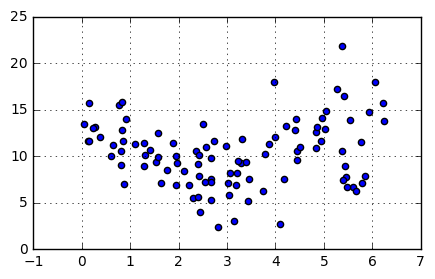

In [3]:
#(x,t)
X = [x[0] for x in data]
T = [x[1] for x in data]
fig, ax = plt.subplots(1,1, figsize = (5,3))
ax.scatter(T,X)
ax.grid()

In [41]:
def lnprob(x):
    if x[3] < 0:
        return -np.infty
    else:
        return \
    -0.5*x[3]*np.sum([(e[0] - x[0] - (x[1]*np.sin(e[1]) + x[2]*np.cos(e[1])))**2 for e in data])\
    +0.5*N*np.log(x[3]) - \
    0.5*(x[0]**2 + x[1]**2 + x[2]**2) - x[3]

#lnprob returns probability of likelihood + prior of with values from dataset and parameters specified.

In [42]:
nwalkers = 20

ndim = 4
p0 = np.random.rand(nwalkers*ndim).reshape((nwalkers,ndim))
sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
pos, prob, state = sampler.run_mcmc(p0, 1000)
sampler.reset()
pos, prob, state = sampler.run_mcmc(pos, 1000)
samples = sampler.flatchain
#^^emcee generates sample data points based off of probability from lnprob

In [43]:
def MonteCarlo(f, samples):
    N = len(samples)
    return 1/float(N)*sum([f(e) for e in samples])
#given f and samples MonteCarlo returns 
omega0 = MonteCarlo(lambda x: x[0], samples)
omega1 = MonteCarlo(lambda x: x[1], samples)
omega2 = MonteCarlo(lambda x: x[2], samples)
lam = MonteCarlo(lambda x: x[3], samples)
print ('o0 = {0}, o1 = {1}, o2 = {2}, l = {3}'.format(omega0, omega1, omega2, lam))

o0 = 9.45935796296, o1 = -0.577448147326, o2 = 1.78734615909, l = 0.0950921313549


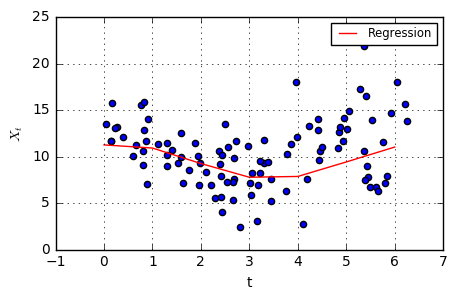

In [47]:
# Using Omega values determined from MonteCarlo + emcee - plot regression with data points below:
Xval = np.arange(0,7)
Reg = [omega0 - omega1*np.sin(x) + omega2*np.cos(x) for x in Xval]
#omega0 adjusts Xt of regression
#omega1 does't seem to have an effect on regression line
fig, ax = plt.subplots(1,1, figsize = (5,3))
ax.scatter(T,X)
ax.plot(Xval, Reg, label ='Regression', color = 'red')
ax.set_xlabel('t')
ax.set_ylabel('$X_t$')
ax.legend(loc = 'best', fontsize='small')
ax.grid()

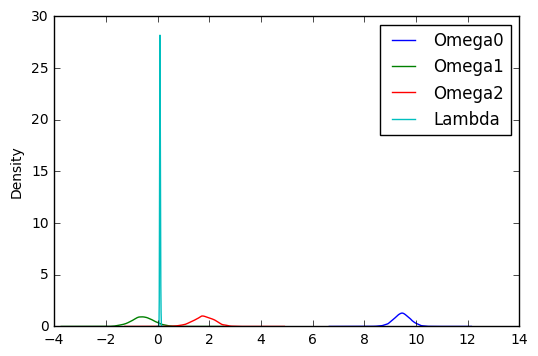

In [49]:
import pandas as pd
data = pd.DataFrame(samples, columns =['Omega0', 'Omega1', 'Omega2', 'Lambda'])
data.plot(kind = 'density')

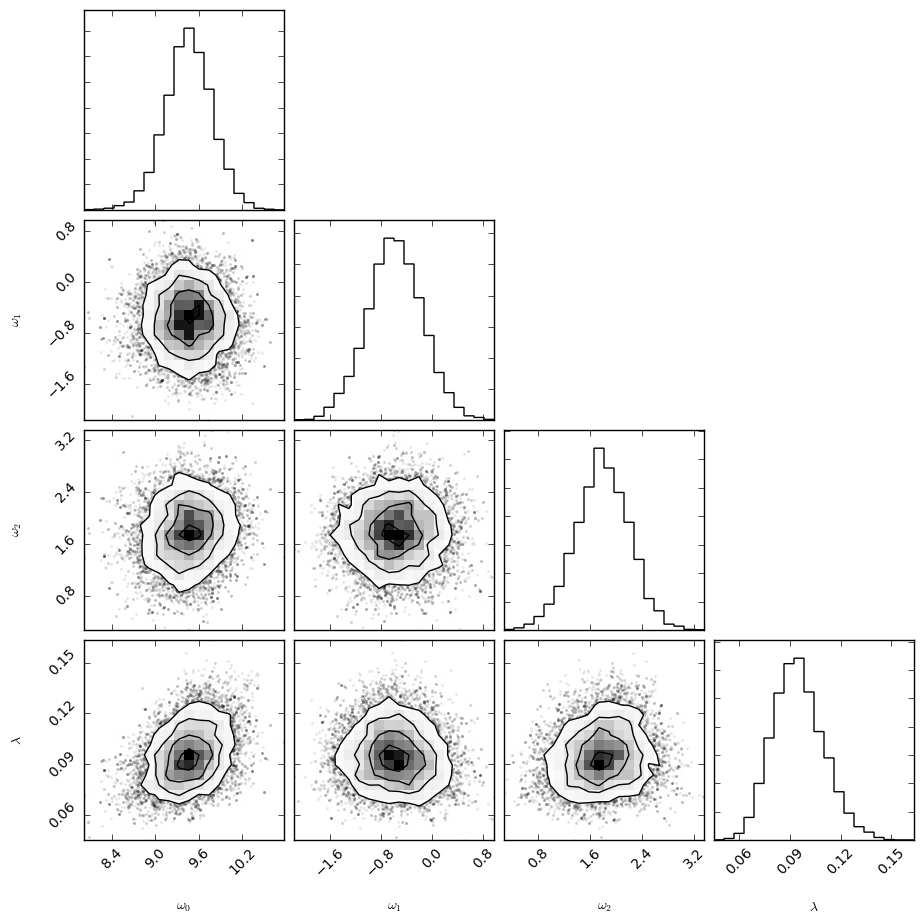

In [50]:
import corner
fig = corner.corner(samples, labels=["$\omega_0$", "$\omega_1$", "$\omega_2$", "$\lambda$"])